In [79]:
import csv
from numpy import *
from scipy.interpolate import *
from matplotlib.pyplot import *
from scipy.stats import *
%matplotlib inline
import pandas as pd

In [80]:
set_printoptions(threshold= sys.maxsize)


In [81]:
f_path = '/Users/mayankchourasia/Desktop/crop_yield/bagalkot_rain.csv'
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
dataRain = array([])# stores the annual rain data
dataYear = array([])# correspnding year
for i in reader:
    if flag == 0:
        flag = 1
        continue
    elif flag == 1:
        startYearOfTestDataTrain = int(i[0])
        flag = 2
    dataYear = append(dataYear,int(i[0]))#taking years
    dataRain = append(dataRain,float(i[1]))

In [82]:
for i in reader:
    if flag == 0:
        flag = 1
        continue
    elif flag == 1:
        startYearOfTestDataTrain = int(i[0])
        flag = 2
    dataYear = append(dataYear,int(i[0]))#taking years
    dataRain = append(dataRain,float(i[1]))

In [83]:
year = (1920 - startYearOfTestDataTrain)
print("yerrs to plot : ", year, "\tStart year : ", startYearOfTestDataTrain)
print("data to plot : ", dataRain[year:year+13])
p1 = polyfit(dataYear,dataRain,2)

yerrs to plot :  19 	Start year :  1901
data to plot :  [ 539.089  739.757  545.268  574.574  616.002  713.176  572.121  658.608
  789.875  732.906  748.284  803.945 1171.418]


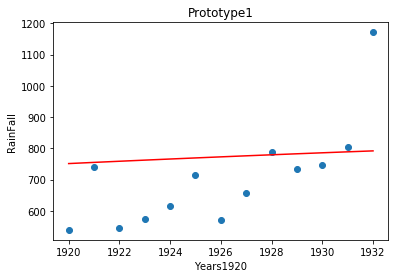

Start year of test data :  1901


In [84]:
plot(dataYear[year:year+13],dataRain[year:year+13],'o')# plotting the actual rain data on graph as blue dots
plot(dataYear[year:year+13],polyval(p1,dataYear[year:year+13]),'r-')# drawing a curve formed by polynomial
xlabel("Years"+str(year+startYearOfTestDataTrain))
ylabel("RainFall")
title("Prototype1")
#print(dataYear[year],dataRain[year],polyval(p1,dataYear[year]),sep = " ")
show()


file.close()

testDataYear = array([])# stores the test data years
testDataRain = array([])# stores the test data rain
file = open(f_path)
reader = csv.reader(file)
flag1 = 0
for i in reader:
    if flag1 == 0:
        flag1 = 1
        continue
    elif flag1 == 1:
        startYearOfTestData = int(i[0])
        flag1 = 2
    testDataYear = append(testDataYear,int(i[0]))
    testDataRain = append(testDataRain,float(i[1]))
file.close()
print("Start year of test data : ",startYearOfTestData)



weights of model_fitted ===> 

 [-3.22478817e-02  1.27600267e+02 -1.25362591e+05] 


Year		Actual Rain		Predicted Rain
--------------------------------------------------------------------
1901 		 707.369 		 668.090195939687
1902 		 656.829 		 673.0517691794375
1903 		 993.264 		 677.9488466557668
1904 		 555.423 		 682.7814283687476
1905 		 494.907 		 687.5495143183216
1906 		 911.206 		 692.2531045045034
1907 		 678.154 		 696.8921989273076
1908 		 543.776 		 701.4667975867051
1909 		 672.649 		 705.976900482754
1910 		 886.985 		 710.4225076153962
1911 		 683.514 		 714.8036189846316
1912 		 648.611 		 719.1202345905185
1913 		 746.667 		 723.3723544329841
1914 		 846.487 		 727.5599785120867
1915 		 949.066 		 731.6831068278116
1916 		 1074.779 		 735.7417393801152
1917 		 921.571 		 739.7358761690557
1918 		 452.562 		 743.6655171945895
1919 		 720.292 		 747.5306624567602
1920 		 539.089 		 751.3313119555387
1921 		 739.757 		 755.0674656909105
1922 		 545.268 		 758.73912366293

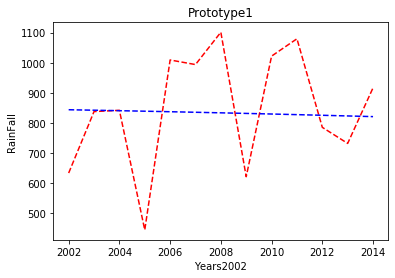

In [85]:
predictedData = p1[0] * testDataYear**2 + p1[1] * testDataYear + p1[2]# stores the predicted rain data
#predictedData = p1[0] * testDataYear**3 + p1[1] * testDataYear**2 + p1[2] * testDataYear + p1[3]
print("\n\nweights of model_fitted ===> ")
print('\n',p1,'\n\n')
print("Year"+"\t\t"+"Actual Rain"+"\t\t"+"Predicted Rain")
print("--------------------------------------------------------------------")

#for i in range(testDataYear.size):
    #print(testDataYear[i],"\t",testDataRain[i],"\t",predictedData[i])
year = (2002 - startYearOfTestData)
temp = startYearOfTestData
i = 0
#print(predictedData[year:year+13])
while i < int(testDataRain.size):
    if predictedData[i]<0:
        predictedData[i] = 0
    print(startYearOfTestData,"\t\t",testDataRain[i],"\t\t",predictedData[i])
    i+=1
    startYearOfTestData+=1

plot(testDataYear[year:year+13],testDataRain[year:year+13],'r--')# actual curve
plot(testDataYear[year:year+13],predictedData[year:year+13],"b--")# predicted curve
xlabel("Years"+str(year+temp))
ylabel("RainFall")
title("Prototype1")
show()
#  ----------:::::::::::>>>>>
rainfit = p1[0] * dataYear**2 + p1[1] * dataYear + p1[2]

In [86]:
yresid = rainfit - dataRain
SSresid = sum(pow(yresid,2))
SStotal = len(dataRain)*var(dataRain)
rsq = 1- SSresid/SStotal
print(rsq)

0.08586957705010434


In [87]:

def save_model(array, name):
    np.savetxt(name+".csv", array, delimiter=",")

In [88]:

def load_model(name):
    with open(name+".csv", 'r') as read_file:
        reader = csv.reader(read_file)
        data = []
        for row in reader:
            data.append(row[0])
    read_file.close()
    data = np.asarray(data, dtype=np.float64)
    return data

In [89]:
def _predict_rain(model, year):
    x = year
    eq_sum = 0
    for j in range(0, model.shape[0]):
        eq_sum += (model[j] * (x**(model.shape[0]-j-1)))
    if eq_sum < 0:
        eq_sum = 0
    print(eq_sum)
    return eq_sum

In [90]:
save_model(p1, 'bagalkot_rain')


In [91]:
model = load_model('bagalkot_rain')
model

array([-3.22478817e-02,  1.27600267e+02, -1.25362591e+05])

In [92]:
_predict_rain(model, 2020)


805.6926567302435


805.6926567302435